## 9. Numerical Integration (4P) 
In this exercise, you are going to implement your own version of Newton-Cotes integration and test it on the function $f(x)$:
		
        
$f(x) = \frac{\sin(x)}{x} + 1$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 9.1
Define a function $fun$ that takes a value $x$ and returns the corresponding value $f(x)$. Be sure to test whether your function returns the correct value at $x = 0$. Plot the function for $x \in [-1,10]$

In [2]:
def fun(x):
    f = np.sinc(x/np.pi) + 1
    return f

assert fun(1) == np.sin(1)/1 + 1

Text(0, 0.5, 'y')

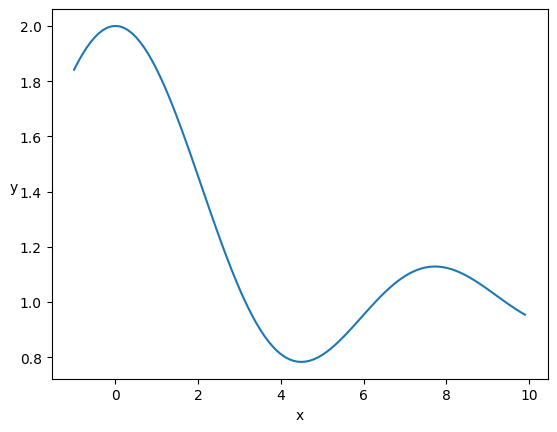

In [3]:
data = []
xl = np.arange(-1, 10, 0.1)
for i in xl:
    data.append(fun(i))

fig, ax = plt.subplots()
ax.plot(xl,data)
ax.set_xlabel("x")
ax.set_ylabel("y", rotation = 0)

### 9.2
Define a function $\texttt{trapezoid(a, b, f)}$ which should return the area under the curve $f$ in the interval $a$ to $b$ in accordance with the Trapezoid rule. $\textbf{Hint:}$ It is possible in Python to pass function names as input to another function.
Test your function by integrating $f(x)$ from $-1.0$ to $10.0$ using 500 interpolation points. $\textbf{Hint:}$ The result should be around 13.60.

In [4]:
def trapezoid(a, b, f, n=500):
    I = 0
    bi = b
    s = (b-a)/n
    for i in range(n):
        ai = bi - s
        I += (bi-ai) * (f(ai)+f(bi))/2
        bi = ai
    return I

v = trapezoid(-1, 10, fun)
print(v)

13.604415352538046


### 9.3
Define a function $\texttt{simpson(a, b, f)}$ which should work in much the same way but implements the Simpson rule. Test your function by integrating $f(x)$ from $-1.0$ to $10.0$ using 500 interpolation points.

In [5]:
def simpson(a, b, f, n=500):
    I = 0
    bi = b
    s = (b-a)/n
    for i in range(n):
        ai = bi - s
        h = (bi-ai)/2
        I += h/3 * (f(ai) + 4*f(ai+h) + f(bi))
        bi = ai
    return I

v = simpson(-1,10,fun)
print(v)

13.604430664605673


### 9.4
Compare the accuracy of the two integration rules by integrating $f(x)$ from $-1.0$ to $10.0$ with different numbers of interpolation points [4, 8, 16, 32, 64] in the area. Plot the result of the integration against the number of interpolation points.

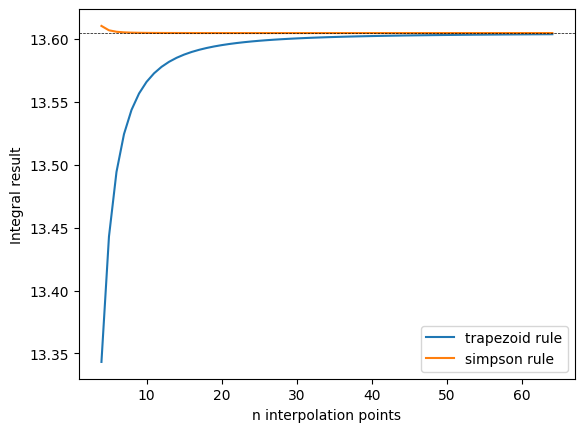

In [6]:
data1 = []
data2 = []
l = np.arange(4,65,1)
for i in l:
    data1.append(trapezoid(-1,10,fun,i))
    data2.append(simpson(-1,10,fun,i))

fig, ax = plt.subplots()
ax.plot(l, data1)
ax.plot(l, data2)
ax.axhline(13.6044, linewidth = 0.5, color = "black", linestyle = "--")
ax.set_xlabel("n interpolation points")
ax.set_ylabel("Integral result")
ax.legend(["trapezoid rule", "simpson rule"])

## 10. Partial Differential Equation (5P)

In this exercise, you will solve the 1D heat equation numerically and visualize the results for varying conditions.

The 1D heat equation is given by:

\begin{equation}
    \frac{ \partial T(x,t)}{ \partial t} = \kappa \frac{\partial^2 T(x,t)}{\partial x},
\end{equation}

with $\kappa$ being the thermal diffusion coefficient and $T(x, t)$ being the temperature at position $x$ and time $t$, respectively.

To solve the equation, we can use the forward-time centered-space (FTCS) method:

\begin{equation}
    T_i^{n+1} = T_i^{n} + \frac{\kappa\tau}{h^2} (T_{i+1}^{n}+T_{i-1}^{n}-2T_{i}^{n}) 
\end{equation}

with $\tau$ and $h$ being the time and spatial step size, respectively.

The problem scenario: we apply constant heat to the left end of a bar of length $L$ and are interested about the resulting temperature profile $T$ after a certain amount of time.

### 10.1
Use the provided heat$\_$eqn function to solve the 1D heat equation for the given parameters below and visualize the initial and final temperature profiles using a line plot (y:temperature, x: bar grid points).
As boundary conditions, assume constant heat applied to the left end of the bar, whereas the right end of the rod should remain at 0 temperature.


In [7]:
# Define the problem
L = 1.0 # length of the rod
N = 101 # number of grid points
dx = L / (N - 1) # spatial step size
x = np.linspace(0, L, N) # grid points

# Initial temperature profile, heating the bar at the left end
u0 = np.zeros_like(x) 
u0[0] = 100

kappa = 1e-1 # thermal diffusivity
T = 0.5 # final time
dt = dx**2 / (4 * kappa) # time step size

In [8]:
def heat_eqn(u0, dx, dt, T, kappa):
    N = len(u0)
    r = kappa * dt / dx**2
    u = u0.copy()
    for n in range(int(T/dt)):
        u[1:-1] += r * (u[:-2] + u[2:] - 2*u[1:-1])
    return u

Text(0.5, 0, 'x')

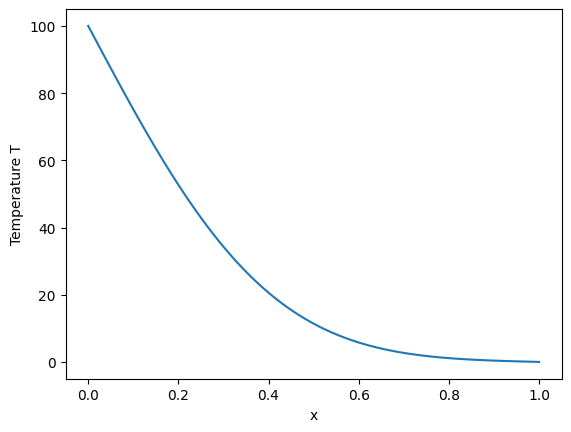

In [9]:
u1 = heat_eqn(u0, dx, dt, T, kappa)

fig, ax = plt.subplots()
ax.plot(x,u1)
ax.set_ylabel("Temperature T")
ax.set_xlabel("x")

### 10.2 

Study the influence of the time step size $dt = dx^2 / (4 * \kappa)$ by multiplying $dt$ with 1e-3 and 3, respectively.
   Plot the final temperature profiles for both $dt$ values in two subplots and discuss the results.
   In case you can not plot $3*dt$, discuss possible reasons.

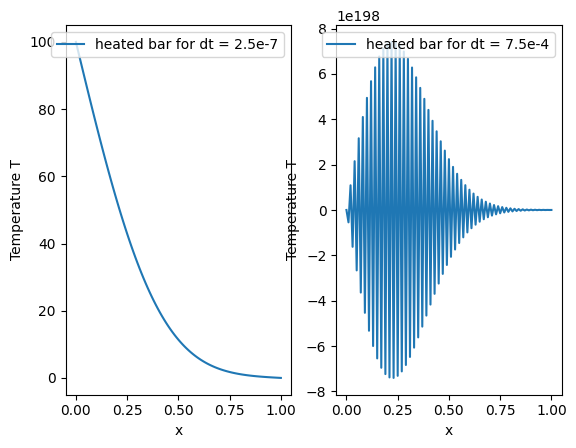

In [10]:
dt1 = dx**2 / (4 * kappa) * 1e-3
dt2 = dx**2 / (4 * kappa) * 3
u2 = heat_eqn(u0, dx, dt1, T, kappa)
u3 = heat_eqn(u0, dx, dt2, T, kappa)

fig, ax = plt.subplots(1,2)
ax[0].plot(x,u2)
ax[0].set_xlabel("x")
ax[0].set_ylabel("Temperature T")
ax[0].legend(["heated bar for dt = 2.5e-7"])
ax[1].plot(x,u3)
ax[1].set_xlabel("x")
ax[1].set_ylabel("Temperature T")
ax[1].legend(["heated bar for dt = 7.5e-4"])


For *3, so dt = 7.5e-4, r > 0.5 and the second part of the heat equation, depending on the neighbouring cells becomes a higher contributing factor to the new value of the cell, than it's old value. Therefore emerges an oszillatory behaviour. The underlying behaviour going from 100 to 0 is still there, however it is made unrecognizable by the sheer magnitude of the oszillations.

### 10.3

Study the influence of the thermal diffusion coefficient by setting $\kappa$ to [1e-3, 1e-2, 1e-1, 1], respectively. Choose a $dt$ value that works for all $\kappa$. Keep the other parameters fixed as defined in 10.1. Visualize and shortly discuss the results.
   $\textbf{Hint}$: You found an appropriate $dt$ when no numerical issues occur. Start with $dt$ as defined in 10.1 and modify from there.

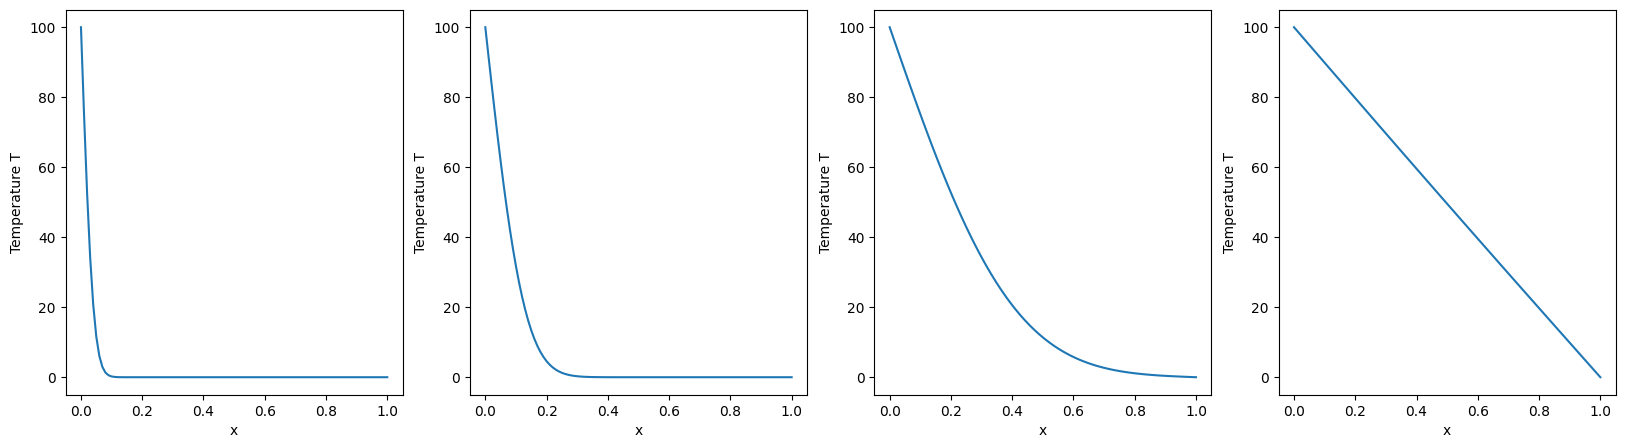

In [11]:
k = [1e-3, 1e-2, 1e-1, 1]
data = []
for ki in k:
    data.append(heat_eqn(u0, dx, dt * 0.2, T, ki))

fig, ax = plt.subplots(1,4,figsize= (20,5))
for i in range(4):
    ax[i].plot(x, data[i])
    ax[i].set_ylabel("Temperature T")
    ax[i].set_xlabel("x")


The factor Kappa, the thermal diffusion influences the amount of heat lost to the surroundings.
For sinking kappa, only the points closer to the source, with more heat supplied, can keep a temperature above 0.
For Kappa = 1, you can see that the temperature becomes a linear function of x. It flows from supply to sink with no energy lost.

### 10.4 

Instead of heating the metal bar at the left end, define a new temperature profile u0_mid that heats the bar approximately in the middle.
   Make a copy of the heat$\_$eqn function from 10.1 and name it heat$\_$eqn$\_$mid. Modify heat$\_$eqn$\_$mid such that the temperature in the middle of the rod is constant and 0 at both ends of the rod, respectively. 
   Visualize the initial and final temperature profiles for the parameters below.

Text(0.5, 0, 'x')

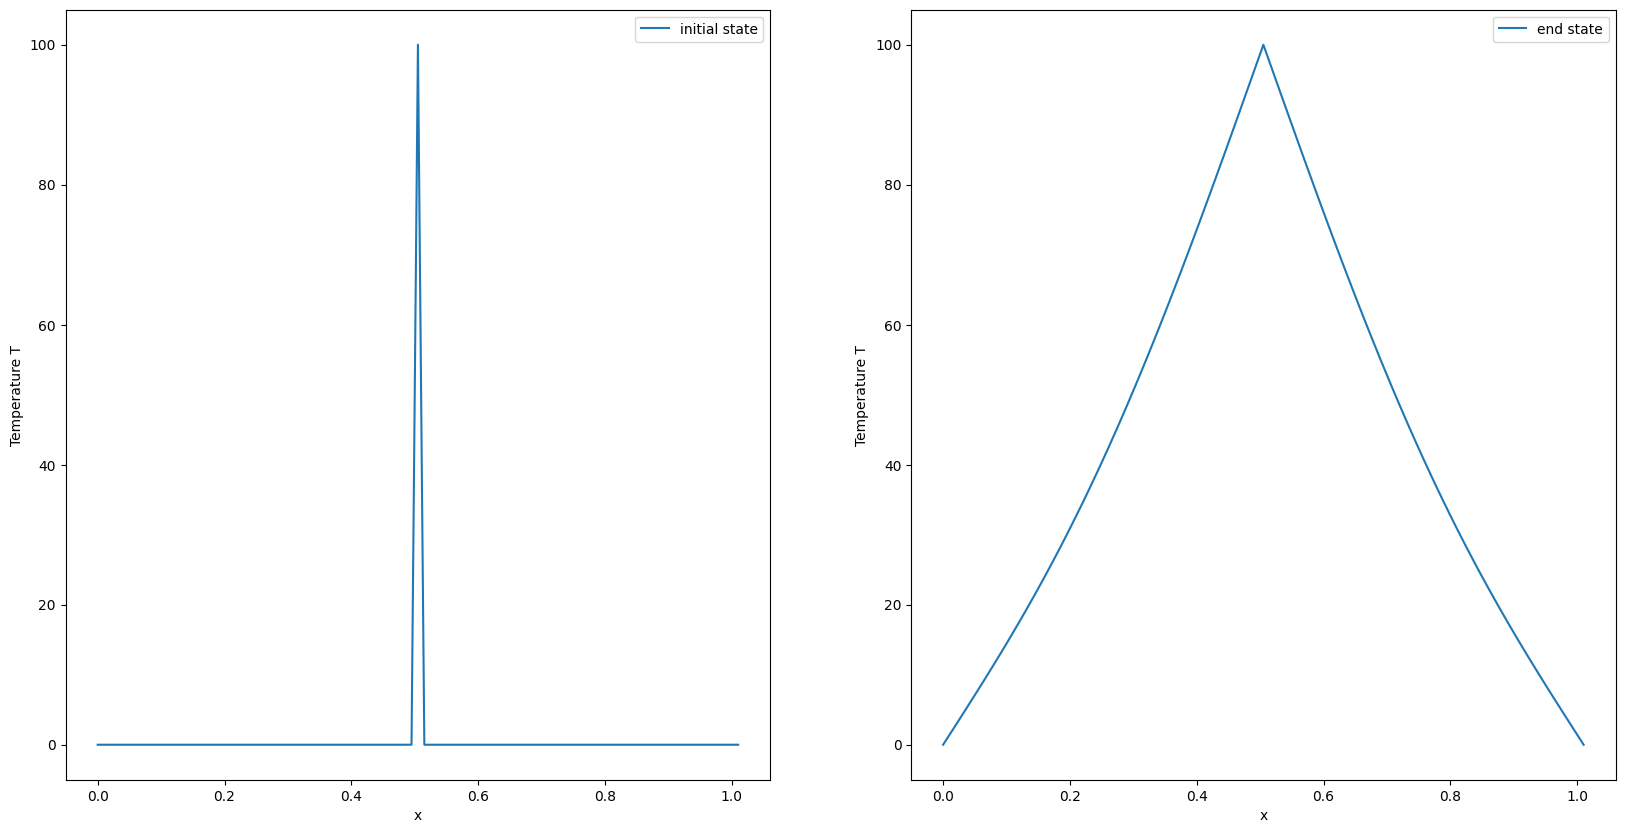

In [12]:
# Define the problem
L = 1.01 # length of the rod
N = 101 # number of grid points
dx = L / (N - 1) # spatial step size
x = np.linspace(0, L, N) # grid points

kappa = 1e-1 # thermal diffusivity
T = 0.5 # final time
dt = dx**2 / (4 * kappa)  # time step size

# Define the new temperature profile u0_middle here
u0_middle = np.zeros_like(x)
u0_middle[50] = 100

def heat_eqn_mid(u0, dx, dt, T, kappa):
    N = len(u0)
    r = kappa * dt / dx**2
    u = u0.copy()
    for n in range(int(T/dt)):
        u[1:-1] += r * (u[:-2] + u[2:] - 2*u[1:-1])
        u[50] = 100
    return u

u1_middle = heat_eqn_mid(u0_middle, dx, dt, T, kappa)
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(x, u0_middle)
ax[0].legend(["initial state"])
ax[1].plot(x, u1_middle)
ax[1].legend(["end state"])

ax[0].set_ylabel("Temperature T")
ax[0].set_xlabel("x")
ax[1].set_ylabel("Temperature T")
ax[1].set_xlabel("x")
